## Introduction to Statistical Testing
You did it! You made it to week four. We've saved one of the best (and hardest) lessons for last. This lesson will cover statistical testing within Jupyter Notebooks. 

## Importing Packages
Let's go ahead and import the necessary packages. Again, we'll go ahead and import Numpy and Pandas. This time around, we'll also be importing **SciPy**. SciPy, short for Scientific Python is a package that allows us to use scientific and mathematic tools for working with data. It works extremely well with Pandas and NumPy since it was created by the same developers. Speficically, we'll be importing the **subpackage** stats from SciPy. All a subpackage is is a package within another package. We'll import the SciPy package, and you can try importing Pandas and Matplotlib yourself below. 

In [1]:
from scipy import stats 

# TODO: Import pandas (with the alias pd)
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

We'll also import the random package, but you shouldn't worry about this much. It's functionality is in generating random numbers that we can use as fake data for plotting later on. With this package, we can generate random numbers between zero and one using `random.random()`. You may notice below that we call `random.seed(1)`. This is so that whenever and wherever we run the code, the same random numbers are generated regardless. Be sure to check out [this video](https://www.khanacademy.org/computing/computer-science/cryptography/crypt/v/random-vs-pseudorandom-number-generators) if you'd like to learn more about what this package, and random number generators in general, do. 

In [18]:
import random
random.seed(5)

## Getting our Data
For this lesson, we'll be working with two different scientific datasets. The first dataset contains daily temperatures recorded in Florida and Colorado. The second dataset contains the daily temperature and humidity  recorded in Florida only. This data comes from NEON, where all of the other data that you have worked with thus far comes from as well! Interestingly enough, the Florida data that we'll be working with today comes from the NEON DSNY site, which is located in Disney! Check out the links for more information on the [DSNY](https://www.neonscience.org/field-sites/field-sites-map/DSNY) site or the [CPER](https://www.neonscience.org/field-sites/field-sites-map/CPER) site. 

In [3]:
temperature_data = pd.read_csv('https://raw.githubusercontent.com/Sci-Teens/course-one/main/data/temperatureData.csv', index_col=0)
humidity_data = pd.read_csv('https://raw.githubusercontent.com/Sci-Teens/course-one/main/data/humidityData.csv', index_col=0)

## Mean Tests
**Mean Tests** allow us to test how different two groups of similar data are by looking at the mean of the data. In our case, we're dealing with similar data from two different locations: temperatures recorded at DSNY and temperatures recorded at CPER (in Celsius). Let's examine the first five values from our `temperature_data` dataframe 

In [4]:
# TODO: Examine first five values in the temperature_data dataframe
temperature_data.head()

,Date,TemperatureDSNY,TemperatureCPER
0,2019-01-01 00:00:00+00:00,24.3636,-14.7454
1,2019-01-01 00:30:00+00:00,24.2071,-14.8839
2,2019-01-01 01:00:00+00:00,23.9853,-14.8814
3,2019-01-01 01:30:00+00:00,23.6318,-14.9189
4,2019-01-01 02:00:00+00:00,23.2542,-15.0695


As you can see, we have the date and time in one column, the DSNY site temperature (in degrees Celsius) in the second column, and the CPER site temperature (in degrees Celsius) in the last column. Say we wanted to determine whether the mean temperatures over the course of the year differed for the two sites. We could use a **T-test** to examine whether there is a **statistically significant** difference in the mean yearly temperatures for the two sites. T-tests take into account the mean and the variance of two variables to determine whether they are similar or different. Try examining the mean of the DSNY data, and the mean of the CPER data below.

In [5]:
# TODO: Get the mean temperature at DSNY


In [6]:
# TODO: Get the mean temperature at CPER


For now, let's try plotting a histogram for the temperatures of the two sites. We'll plot them on the same plot, and use `alpha=0.5` such that we can see the data on top of one another. Furthermore, we'll use `plt.legend()` to label which color corresponds to which dataset. After running the code below, try adding axis labels and a title to say what the data is showing.

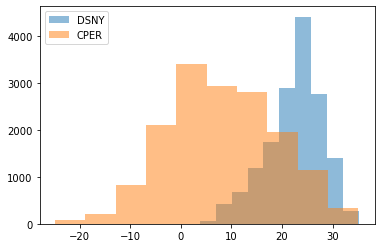

In [7]:
plt.hist(temperature_data['TemperatureDSNY'], alpha=0.5)
plt.hist(temperature_data['TemperatureCPER'], alpha=0.5)
plt.legend(['DSNY', 'CPER'])

# TODO: add a title and axis labels

plt.show()

As you can see, the temperatures recorded at CPER and DSNY are pretty different throughout 2019. Even though our plot gives us a reason to believe that there is a significant difference in the mean temperature between DSNY and CPER, we have to use a T-test to confirm this. We can achieve this using the `stats.ttest_ind` method to conduct and independent t-test on our two data columns. 

**NOTE** you may have noticed the `equal_var=False` argument set below. This has to do with the **variance** of our data. Though we won't go much into the variance represents, you can think of it as describing how spread out our data is. As we can see from the histogram above, our data is not equally spread out (CPER is wider than DSNY), and thus, our data does not have equal variances. 

In [11]:
stats.ttest_ind(temperature_data['TemperatureDSNY'], temperature_data['TemperatureCPER'], equal_var=False)[1]

0.0

As you can see, we got a p-value of 0. <br>  
Well, not exactly; there are limits to the size of numbers that we can store in Python, and there are also rounding errors. In this Jupyter notebook, the smallest number we can store is 0.000000000...... with about 300 more zeros before that. Therefore, it's likely that there was some form of rounding error in our calculation. Such is life; there are ways to avoid and overcome rounding errors, though that is a whole different discussion for another time. <br>  
The extremely low p-value that we received means that we can **reject the null** hypothesis and say that the mean temperatures in Colorado at the CPER site and in Florida at the DSNY site are significantly different. 

## Correlation Test

The last type of statistical testing that we'll cover today is the **Correlation Test**. This allows us to see how much of a relationship two data columns have. However, data can have many forms of correlation. The most typical correlationship that is tested for is a **Linear Relationship**. This simply tests whether there's a linear relationship between two columns of our dataset. For example, check out the plot of some random data that we created below. Don't worry about the code itself for now, just take a look at the data itself.

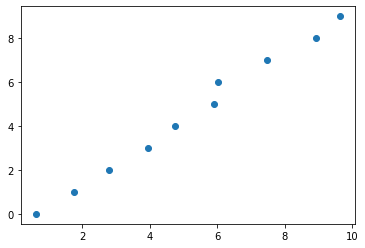

In [19]:
X = [x + random.random() for x in range(10)]
Y = [y for y in range(10)]
plt.scatter(X, Y)
plt.show()

As you can see, our data forms what appears to be a line. The line is also pointing upward, which suggests a **positive correlation** between the x and y data. A positive correlation means that when one variable increases, the other variable is expected to increase as well. We can view this by plotting the line \$y = x\$ over our data.

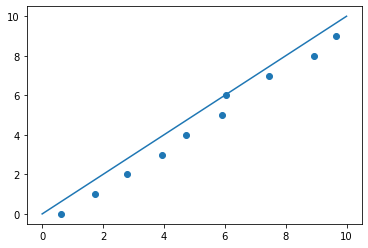

In [20]:
plt.plot([0,10],[0,10])
plt.scatter(X, Y)
plt.show()

As you can see, the points that we plotted fall very close to the line. Next, we'll check out what is called a **negative correlation**. A negative correlation means that when one variable increases, we expect the other variable to decrease. Again, don't worry as much about the code than the plot itself.

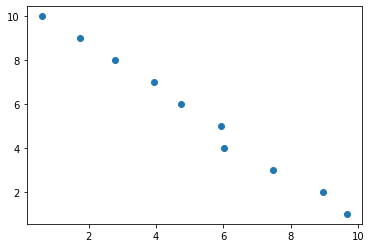

In [21]:
plt.scatter(X, [10 - y for y in Y])
plt.show()

When plot this data with the line \$ y = -x + 10 \$ through it, we can better see the negative relationship in the data.

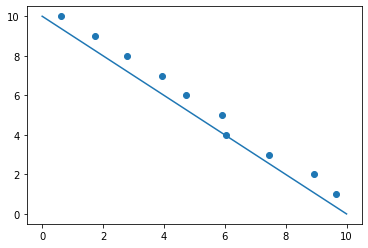

In [22]:
plt.scatter(X, [10 - y for y in Y])
plt.plot([0,10], [10,0])
plt.show()

The last thing we'll cover when it comes to correlation is how correlated data is. In the two figures above, we could say that our data is **strongly linearly correlated**, which means that the data follows a very linear patter. However, if we had data such as below, we would say that our data has a **weak linear correlation**. 

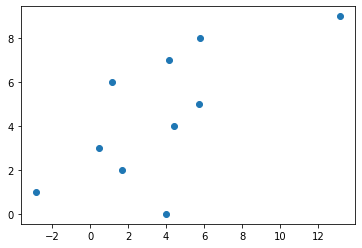

In [23]:
plt.scatter([x+10 * (random.random()-.5) for x in range(10)] , Y)
plt.show()

As you can see, our data barely has a pattern at all. Now that you have a good understanding about how correlation works, let's try checking out our own data. First, let's examine the last five values within our `humidity_data` dataset. 

In [ ]:
# TODO: Examine the last five values within the dataset 


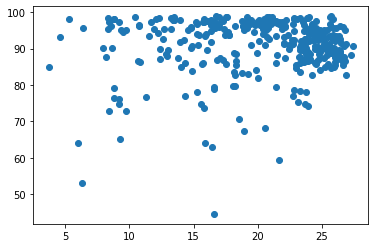

In [24]:
# TODO: Plot temperatures versus humidity on a single chart
plt.scatter(humidity_data['Temperature'], humidity_data['RelativeHumidity'])
plt.show()

Unfortunately, we don't see must of a pattern with this data at all. The most apparent feature of this data is the **cluster** at the top right; this suggests that higher temps likely coencide with higher humidity values. <br>
Today, we'll **Pearson Correlation**, which simply measures whether or not there is a linear relationship between two data. A perfect, positive linear relationship would result in a **Correlation Coefficient** of 1, whereas a perfect negative linear relationship would result in a correlation coefficient of -1. Fortunately, Pandas already has a `corr()` method built in, so we don't even have to bother with using Scipy for this case. The code below will calculate the Pearson Correlation between the temperature and the relative humidity at DSNY. 

In [ ]:
humidity_data['Temperature'].corr(humidity_data['RelativeHumidity'], method='pearson')

As you can see, we got a correlation coefficient of 0.0787. This is close to zero, which suggests that there is no linear correlation between our data. This is evident in our plot above, so no surprises here. Next, we'll try a **Spearman Correlation**, which simply measures how related two data points are. The benefit of using the Spearman Correlation is that the data doesn't have to be linear, all it has to have is some form of a relationship that follows a line or a curve. 

In [ ]:
humidity_data['Temperature'].corr(humidity_data['RelativeHumidity'], method='spearman')

Interestingly enough, this correlation coefficient tells us that our data has a negative relationship; in other words, as the temperature goes up, the humidity tends to go down. However, our coefficient is once again very close to zero, and therefore very weak. Nonetheless, we do see that there is a trend in the upper right hand corner of our plot! This does suggest that our data has some form of a relationship present. We could try **Clustering**, but that's a whole different story in terms of computation. For now, we'll stick with mean and correlation tests.

For now, that's all! Thank you much for participating in this course. Now, it's time for you to dive deeper into your data. We gave you the tools you need to do so, so be sure to dig in and ask for help if needed. Good luck! 